# TE Image processing

Import the necessary modules and activate inline plotting.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [2]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')

In [3]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(194, 192, 3)


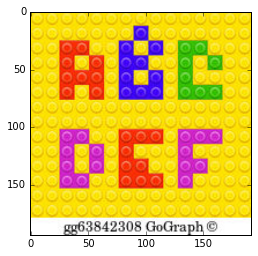

In [5]:
img = cv2.imread("abc.jpg")
print(img.shape)
show(img)

Croping right top corner of abc.jpg image

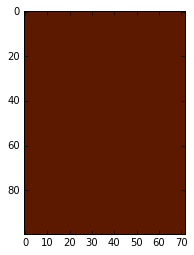

In [6]:
img5 = cv2.imread("abc.jpg")
corner = img5 [0:100, 120:194]
img5 [0:100, 120:194] = (0,25,92)
show(corner)

Translate image by (40, 60) and show

In [7]:
def translate(img, tx, ty):
    M= np.float32([[1, 0, tx],[0, 1, ty]])
    img7 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    show(img7)

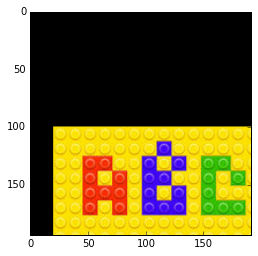

In [8]:
translate(img, 20, 100)

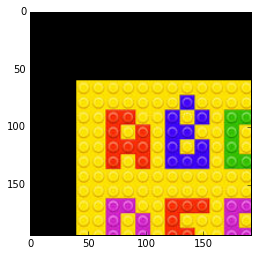

In [9]:
M= np.float32([[1, 0, 40],[0, 1, 60]])
img2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(img2)

Rotate the output by 45° and show

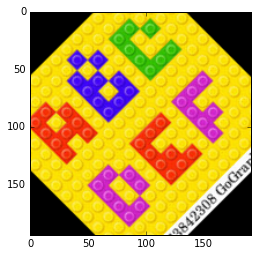

In [10]:
center = (img.shape[1] // 2, img.shape[0] // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
img8 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(img8)

Resize the original image with a 120 px width 

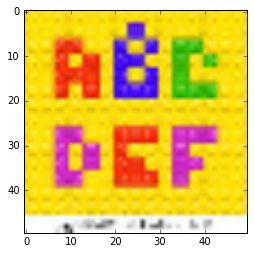

In [11]:
r = 50.0 / img.shape[1]
dim = (50, int(img.shape[0] * r))
img9 = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
show(img9)

Flip the previous result horizontally and show

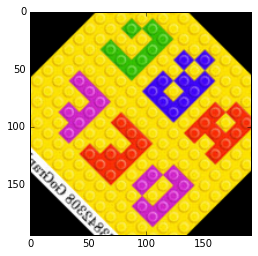

In [12]:
img10 = cv2.flip(img8, 1)
show(img10)

Arithmetic add

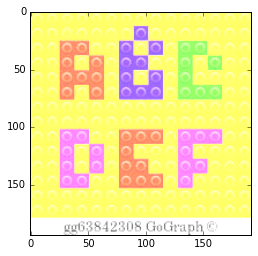

In [13]:
M = np.ones(img.shape, dtype = "uint8") * 100
img11 = cv2.add(img, M)
show(img11)

Arithmetic subtract

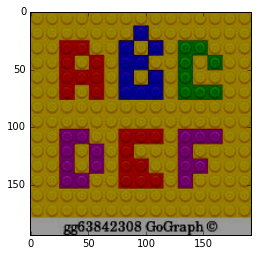

In [14]:
M = np.ones(img.shape, dtype = "uint8") * 100
img11 = cv2.subtract(img, M)
show(img11)

Bitwise operations : create a rectangle

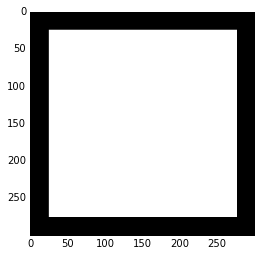

In [15]:
img12 = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(img12, (25, 25), (275, 275), 225, -1)
show(img12)

Bitwise operations: create a circle

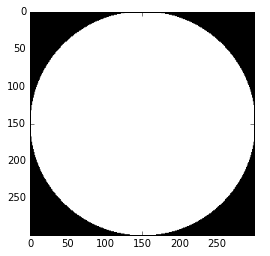

In [16]:
img13 = np.zeros((300, 300), dtype = "uint8")
cv2.circle(img13, (150, 150), 150, 255, -1)
show(img13)

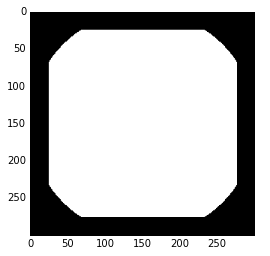

In [17]:
bitwiseAnd = cv2.bitwise_and(img12, img13)
show(bitwiseAnd)

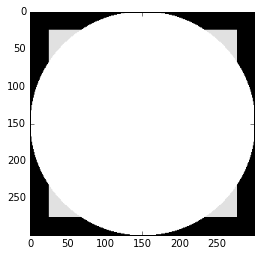

In [18]:
bitwiseOr = cv2.bitwise_or(img12, img13)
show(bitwiseOr)

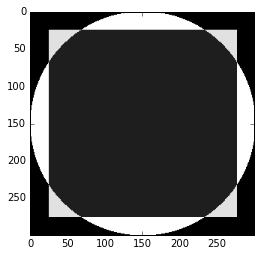

In [19]:
bitwiseXor = cv2.bitwise_xor(img12, img13)
show(bitwiseXor)

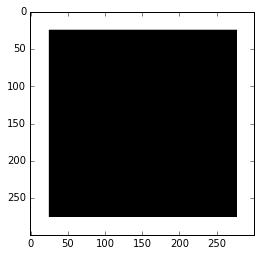

In [20]:
bitwiseNot = cv2.bitwise_not(img12)
show(bitwiseNot)

Create a rectangle mask for letter E

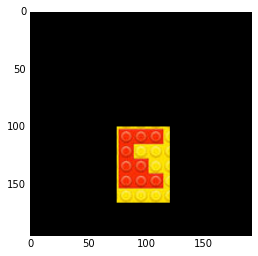

In [21]:
mask = np.zeros(img.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (75, 100), (120 , 165), 255,-1)
show(mask)


masked = cv2.bitwise_and(img, img, mask = mask)
show(masked)

Create a circle mask for letter E

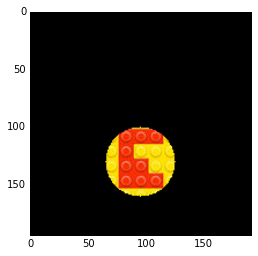

In [22]:
mask2 = np.zeros(img.shape[:2], dtype = "uint8")
cv2.circle(mask2, (95, 130), 30, 255, -1)
show(mask2)

masked2 = cv2.bitwise_and(img, img, mask = mask2)
show(masked2)

Splitting and merging channels

In [39]:
(B, G, R) = cv2.split(img)

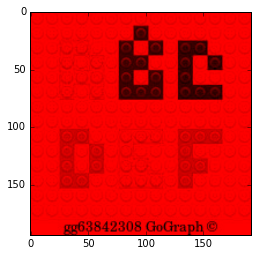

In [40]:
zeros = np.zeros(img.shape[:2], dtype = "uint8")
imgR= cv2.merge([zeros, zeros, R])
show(imgR)

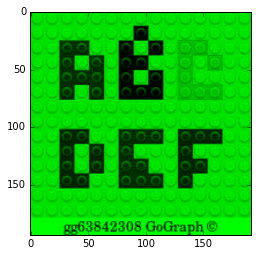

In [41]:
show(cv2.merge([zeros, G, zeros]))

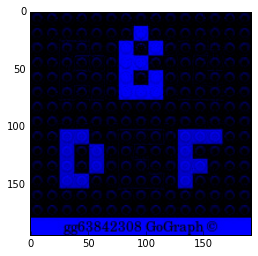

In [42]:
show(cv2.merge([B, zeros, zeros]))

Change the color space il L*A*B

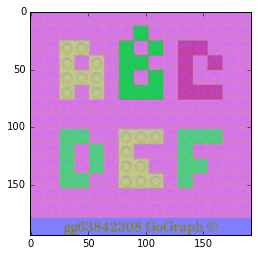

In [43]:
img14 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
show(img14)

## 7 Histograms

Transform to gray-scale image and show

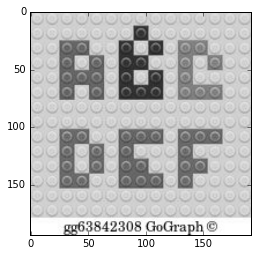

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a histogram

In [64]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

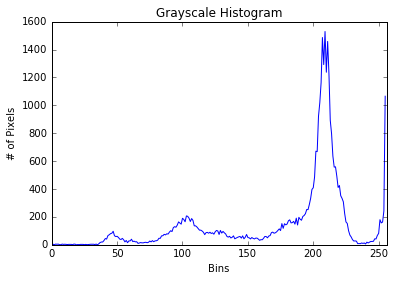

In [65]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

What is the region around
- 50 letter b
- 100 other letters
- 200 it is the yellow part
- 250 the footer of the image

Create an histogram for the three colors of the image

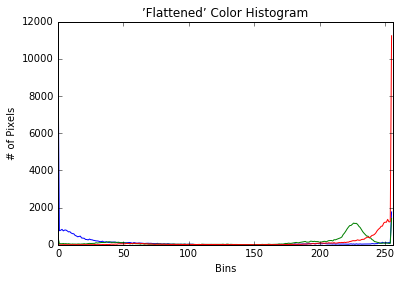

In [66]:
chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

Place a red rectangle around letter C

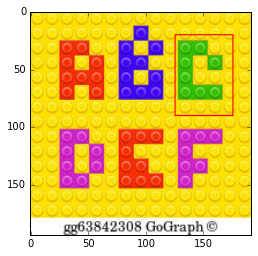

In [30]:
img3 = img.copy()
cv2.rectangle(img3, (125, 20), (175, 90), (0, 0, 255))
show(img3)

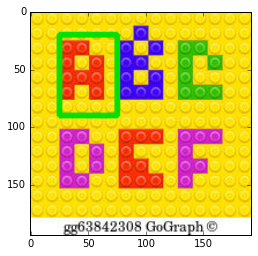

In [31]:
img4 = img.copy()
cv2.rectangle(img4, (25, 20), (75,90), (0,225,2),4)
show(img4)

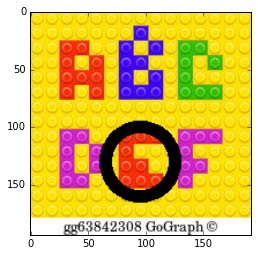

In [38]:
img6 = cv2.imread("abc.jpg")
cv2.circle(img6, (95, 130), 30, (0,0,0), 10)
show(img6)

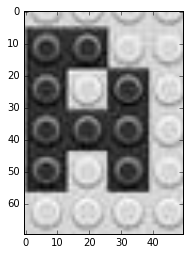

In [68]:
letter_A = gray[20:90, 25:75]
show(letter_A)

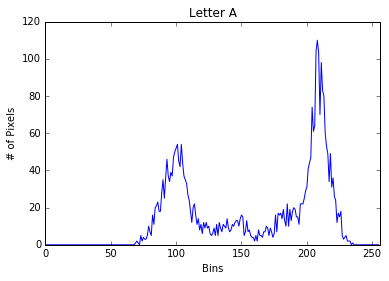

In [69]:
hist_A = cv2.calcHist([letter_A], [0], None, [256], [0, 256])
histogram(hist_A, "Letter A")

## 8 Smoothing

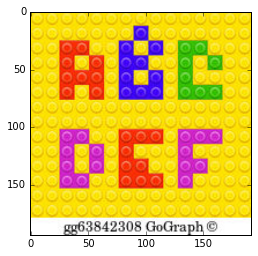

In [70]:
show(img)

(100, 192, 3)


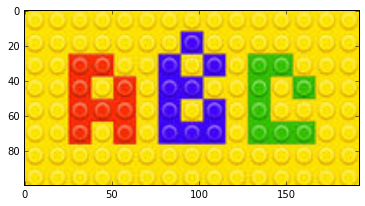

In [71]:
img2 = img[0:100, :, :]
print(img2.shape)
show(img2)

Show 3 horizontally stacked blurred images with a blur size of 3, 5, 7

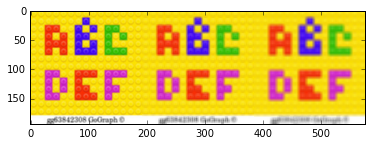

In [80]:
blurred = np.hstack([
    cv2.blur(img, (3,3)),
    cv2.blur(img, (5,5)),
    cv2.blur(img, (7,7)),
])
show(blurred)

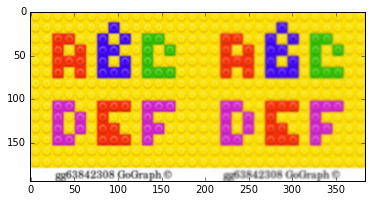

In [84]:
img15 = np.hstack([
    cv2.GaussianBlur(img, (3,3), 0),
    cv2.GaussianBlur(img, (5,5), 0)])
show(img15)

## 9 Thresholding

Transform into grayscale and select appropriate binary threshold, based on previous histogram, to show the letters in black.

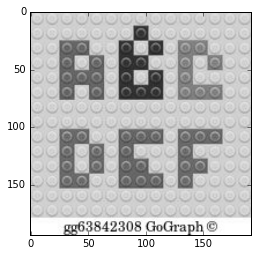

In [37]:
show(gray)

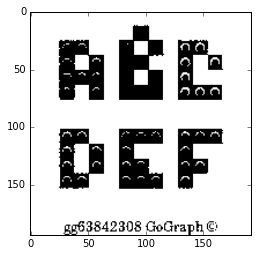

In [13]:
(T, thresh) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
show(thresh)

Show the letters in white (THRESH_BINARY_INV).

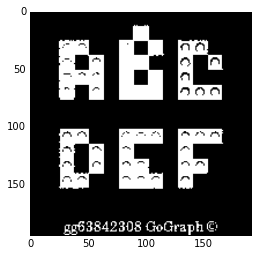

In [42]:
(T, thresh2) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh2)

## 10 Edge detection

Blur the grayscale image by (5,5), then use Canny edge detection and show the result.

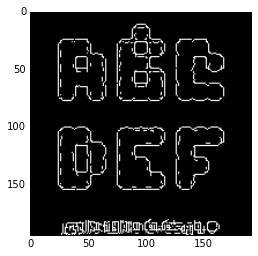

In [25]:
gray2 = cv2.blur(gray, (5, 5))
canny = cv2.Canny(gray2, 100, 150)
show(canny)

Use the Laplacian edge detection and show the result

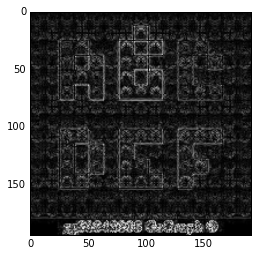

In [23]:
img16 = cv2.Laplacian(gray, cv2.CV_64F)
img16 = np.uint8(np.absolute(img16))
show(img16)

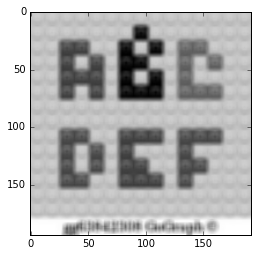

In [47]:
show(gray2)

## 11 Contours

Only use the top 170 pixels

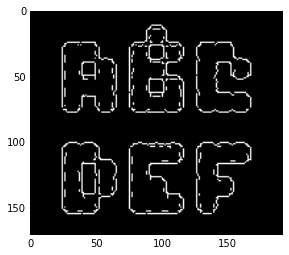

In [27]:
canny2 = canny[0:170, :]
show(canny2)

In [89]:
(_, cnts, _) = cv2.findContours(canny2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))

6
